In [1]:
from predefined import single_linear_model
from model import SingleLinearModel, DoubleLinearModel
from train import Trainer

trainer: Trainer = single_linear_model()

final_acc, final_loss = trainer.invoke_training()

<class 'torch.nn.parameter.Parameter'> torch.Size([512, 784])
<class 'torch.nn.parameter.Parameter'> torch.Size([512])
<class 'torch.nn.parameter.Parameter'> torch.Size([10, 512])
<class 'torch.nn.parameter.Parameter'> torch.Size([10])
Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Epoch 1
-------------------------------
loss: 2.340575  [    0/60000]
loss: 1.039653  [ 6400/60000]
loss: 1.005539  [12800/60000]
loss: 0.898114  [19200/60000]
loss: 0.936857  [25600/60000]
loss: 1.021516  [32000/60000]
loss: 1.045179  [38400/60000]
loss: 0.969584  [44800/60000]
loss: 0.950418  [51200/60000]
loss: 0.965215  [57600/60000]
Test Error: 
 Accuracy: 93.5%, Avg loss: 0.000185 

Epoch 2
-------------------------------
loss: 0.963093  [    0/60000]
loss: 0.902344  [ 6400/60000]
loss: 0.926169  [12800/60000]
loss: 0.883838  [19200/60000]
loss: 0.918280  [25600/60000]
loss: 0.896024  [32000/60000]
loss: 0.894635  [38400/60000]
loss: 0.935770  [44800/60000]
loss: 

40
55
70
126
194
296
305
393
482
491
494
548
550
574
687
717
738
816
898
934
944
1009
1044
1102
1128
1136
1156
1162
1184
1185
1192
1217
1273
1285
1314
1348
1351
1374
1428
1430
1437
1452
1482
1544
1646
1685
1704
1798
1818
1849
1871
1922
2007
2015
2032
2097
2117
2126
2131
2144
2187
2197
2212
2264
2291
2293
2304
2306
2330
2356
2393
2453
2494
2507
2512
2536
2558
2613
2637
2654
2663
2691
2720
2780
2786
2797
2852
2857
2897
3166
3186
3211
3237
3244
3265
3269
3287
3288
3355
3386
3400
3523
3539
3586
3656
3661
3672
3703
3719
3804
3871
3881
4080
4195
4197
4213
4244
4321
4390
4392
4409
4428
4430
4462
4480
4497
4505
4571
4669
4696
4747
4833
4835
4910
4934
4947
4990


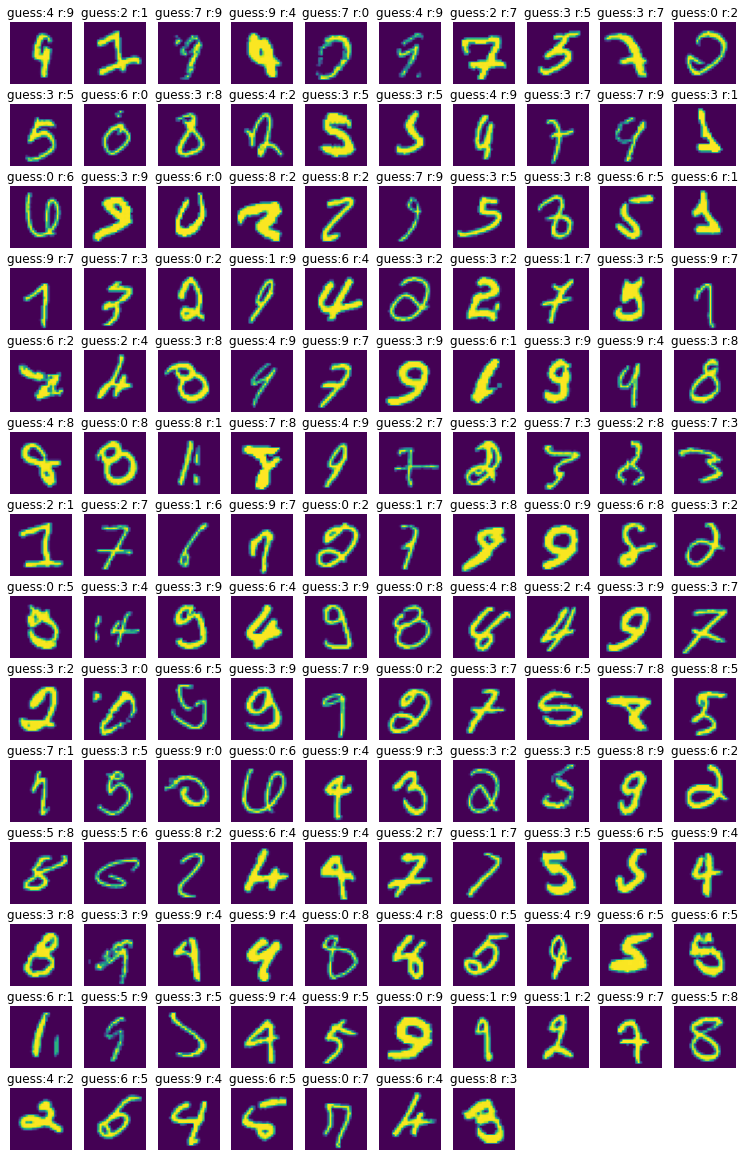

In [15]:
import torch
import matplotlib.pyplot as plt
import numpy as np

correct = 1
torch.manual_seed(1)
en = enumerate(trainer.test_dataloader)
v = next(en)[1]
X, y  = (v[0], v[1])

pred = trainer.model(X)
correct += (pred.argmax(1) == y).type(torch.float).sum().item()
wrong_idx = np.where((pred.argmax(1) != y))[0]

wrong_img = X[wrong_idx]
real_pred = y[wrong_idx]

figure = plt.figure(figsize=(13, 45), facecolor="white")
amount = 300
cols, rows = 10,30

c = 1
for i in wrong_idx:
    print(i)
    img = X[i]
    wrong_guess = pred[i].argmax(0)
    real_pred = y[i]
    figure.add_subplot(rows, cols, c)
    plt.axis("off")
    plt.title(f"guess:{wrong_guess} r:{real_pred}")
    plt.imshow(img.squeeze(), cmap="viridis")
    c += 1
plt.savefig("wrong_guesses.png")
plt.show()

